# Learning Weights for the Draco Model

In this example, we are using a linear SVM model to learn weights for a Draco model. The input to the model are pairs of visualizations where one visualization is preferred to another. We then try to find weights such that most of the pairs are correctly classified. Each visualization is represented as a vector of number of violations.

Given pairs of preferred (postiive) $\lbrack u_1, u_2, ..., u_k \rbrack$ and a not preferred (negative) $\lbrack v_1, v_2, ..., v_k \rbrack$ visualization, we try to maximize the distance between these vectors using ${\arg\max}_w \sum_{i\, \in\, 0...k} w_i \, (u_i-v_i)$. To implement this loss, we subtract the positive and negaitve vectors and learn weights using a linear SVM with one class.

In [1]:
import json
import pandas as pd
from typing import Dict, List, Any
from sklearn.model_selection import train_test_split

from draco import Draco

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.decomposition import PCA

from draco.data_utils import pairs_to_vec
from draco.learn import DracoLearn

In [2]:
default_draco = Draco()

In [13]:
learn_data = {}

with open("./data/saket2018_draco2.json") as file:
    i = 0
    json_data = json.load(file)

    for pair in json_data:
        pair["source"] = "saket_2018"
        pair["pair_id"] = f'{pair["source"]}_{i}'
        learn_data[pair["pair_id"]] = pair
        i += 1

data = pairs_to_vec(learn_data)

assert set(data.negative.columns) == set(
    default_draco.soft_constraint_names
), "Feature names do not match."

INFO:draco.data_utils:Running 1 partitions of 10 items             in parallel on 1 processes.
INFO:draco.data_utils:Hash of dataframe: -8349127518051445564


In [14]:
draco_learn = DracoLearn(data)

Train score:  0.5714285714285714
Dev score:  0.3333333333333333


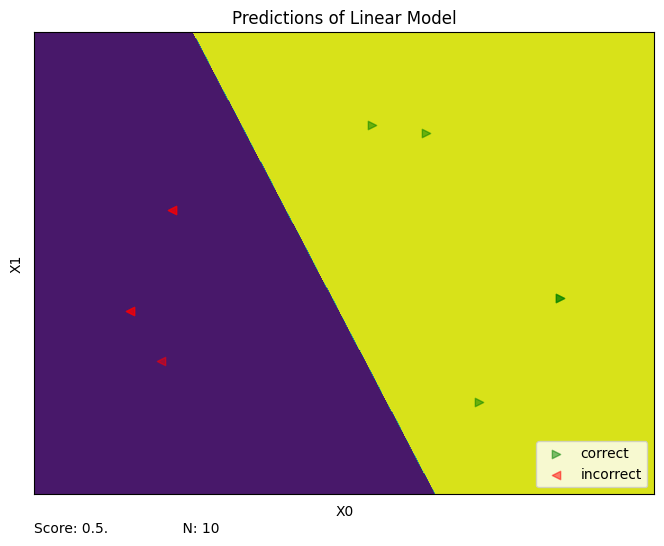

LinearSVC(C=1, fit_intercept=False)

In [15]:
draco_learn.project_and_plot(test_size=0.3)

Train score:  1.0
Dev score:  1.0


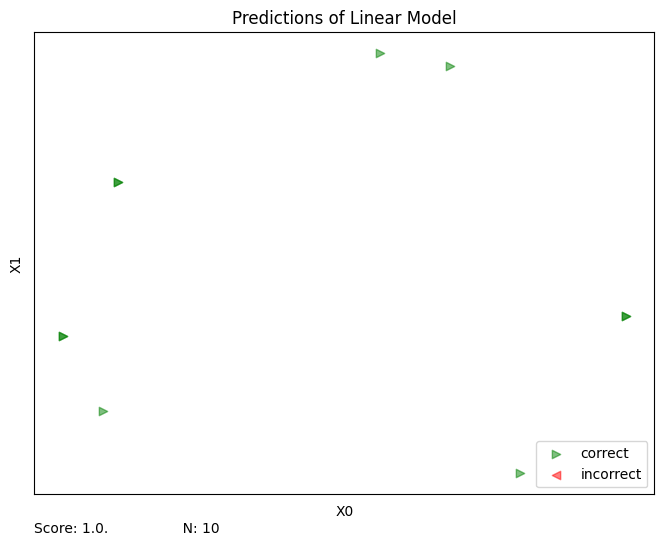

In [16]:
clf = draco_learn.train_and_plot(test_size=0.3)

In [17]:
features = draco_learn.feature_vecs.negative.columns

for feature, weight in zip(features, clf.coef_[0]):
    print(f"#const {feature}_weight = {int(weight * 1000)}.\n")

#const aggregate_weight = 0.

#const aggregate_count_weight = 0.

#const aggregate_group_by_raw_weight = 131.

#const aggregate_max_weight = 0.

#const aggregate_mean_weight = 0.

#const aggregate_median_weight = 0.

#const aggregate_min_weight = 0.

#const aggregate_no_discrete_weight = 131.

#const aggregate_stdev_weight = 0.

#const aggregate_sum_weight = 0.

#const bin_weight = 0.

#const bin_high_weight = 0.

#const bin_low_weight = 0.

#const bin_low_unique_weight = 0.

#const bin_not_linear_weight = 0.

#const binned_orientation_not_x_weight = 0.

#const c_c_area_weight = 0.

#const c_c_line_weight = 371.

#const c_c_point_weight = -240.

#const c_c_text_weight = 0.

#const c_d_col_weight = 0.

#const c_d_no_overlap_area_weight = 0.

#const c_d_no_overlap_bar_weight = -258.

#const c_d_no_overlap_line_weight = -404.

#const c_d_no_overlap_point_weight = 531.

#const c_d_no_overlap_text_weight = 0.

#const c_d_no_overlap_tick_weight = 0.

#const c_d_overlap_area_weight = 0.

#con